# # Project: Investigate a Dataset - [Olympics dataset]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul> 

<a id='intro'></a>
## Introduction

### The Dataset chosen for analysis: Olympics dataset 

>This dataset is a brief about the Olympic Games:
Olympics is one of the biggest sporting events featuring summer and winter sports competitions where thousands of athletes from around the world participate in a variety of competitions. More than 200 nations participate.The Olympic Games are usually held every four years, alternating between the Summer and Winter Olympics every two years in the four-year period. The International Olympic Committee (IOC) as formed in 1894 and the first modern Olympics was held in 1896.  


### Question(s) for Analysis
>How many medals has India won and what was its gender distribution throughout the years?

>How many medals has Japan won and what was its gender distribution throughout the years?

>what is the top 10 Participating Countries?

>What is the age Distribution of participants?

>What are the popular winter and summer olympics sports?

>What is the age Distribution of participants?

>Which countries has won the most (gold, silver, bronze)medals?

>What is the total number of female atheletes in each olympics?

>Who are the Top 10 atheletes with gold medals?

>Are there any atheletes with gold medals after the age of 60?

>Who were Rio Olympics highest 20 countries gold medals winners?

>Show a distribution of height and weight of all participants?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

<a id='wrangling'></a>
## Data Wrangling

>In this section of the report, I will load in the data, check for cleanliness, and then trim and clean the dataset for analysis.

In [2]:
athletes = pd.read_csv('athlete_events.csv')
region = pd.read_csv('noc_regions.csv')

In [3]:
athletes.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


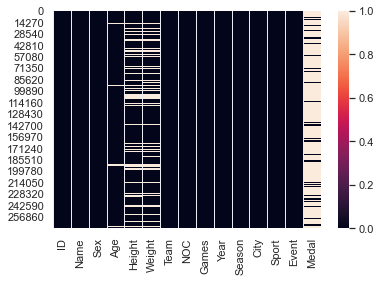

In [4]:
#Checking for null values..
sns.heatmap(athletes.isnull());

In [5]:
region.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [6]:
df = athletes.merge(region, how = 'left', on = "NOC")

In [7]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [8]:
df.rename(columns= lambda x: x.strip().lower().replace(' ','_'), inplace=True)

In [9]:
df.head(1)

,id,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 0 to 271115
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      271116 non-null  int64  
 1   name    271116 non-null  object 
 2   sex     271116 non-null  object 
 3   age     261642 non-null  float64
 4   height  210945 non-null  float64
 5   weight  208241 non-null  float64
 6   team    271116 non-null  object 
 7   noc     271116 non-null  object 
 8   games   271116 non-null  object 
 9   year    271116 non-null  int64  
 10  season  271116 non-null  object 
 11  city    271116 non-null  object 
 12  sport   271116 non-null  object 
 13  event   271116 non-null  object 
 14  medal   39783 non-null   object 
 15  region  270746 non-null  object 
 16  notes   5039 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 37.2+ MB


In [11]:
df.describe()

,id,age,height,weight,year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


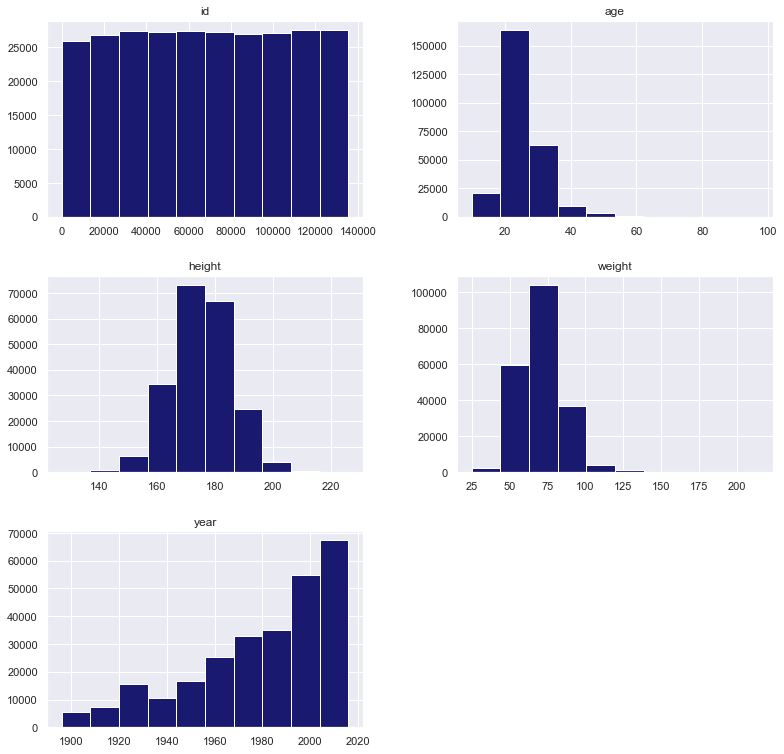

In [12]:
df.hist(figsize = (13,13),
        color = 'midnightblue');

### Data Cleaning
#### The Data Structure:
>Before cleaning the data, we have investigated the structure of our dataset and if there is any null values, missing values,  inconsistency or inadequate datatype, There were also unecessary columns with missing data, inadequate datatypes

###  The Cleaning Process:
>I removed columns that are not necessary for my analysis 'id', 'games', 'event', 'notes' to improve database redability.

>I checked for null values


In [13]:
df.drop(['id', 'games', 'event', 'notes'], axis =1, inplace=True)

In [14]:
df.columns

Index(['name', 'sex', 'age', 'height', 'weight', 'team', 'noc', 'year',
       'season', 'city', 'sport', 'medal', 'region'],
      dtype='object')

In [15]:
df['medal'].unique()

array([nan, 'Gold', 'Bronze', 'Silver'], dtype=object)

In [16]:
df.head(2)

,name,sex,age,height,weight,team,noc,year,season,city,sport,medal,region
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992,Summer,Barcelona,Basketball,NaN,China
1,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012,Summer,London,Judo,NaN,China


# India Details

In [17]:
#Creating a data_frame with only India 
india_df = df.query('team == "India"')

In [18]:
india_df.shape

(1400, 13)

In [19]:
#Calculating how many medal was won for every participation..
india_medals = india_df.groupby('medal')['year'].value_counts()

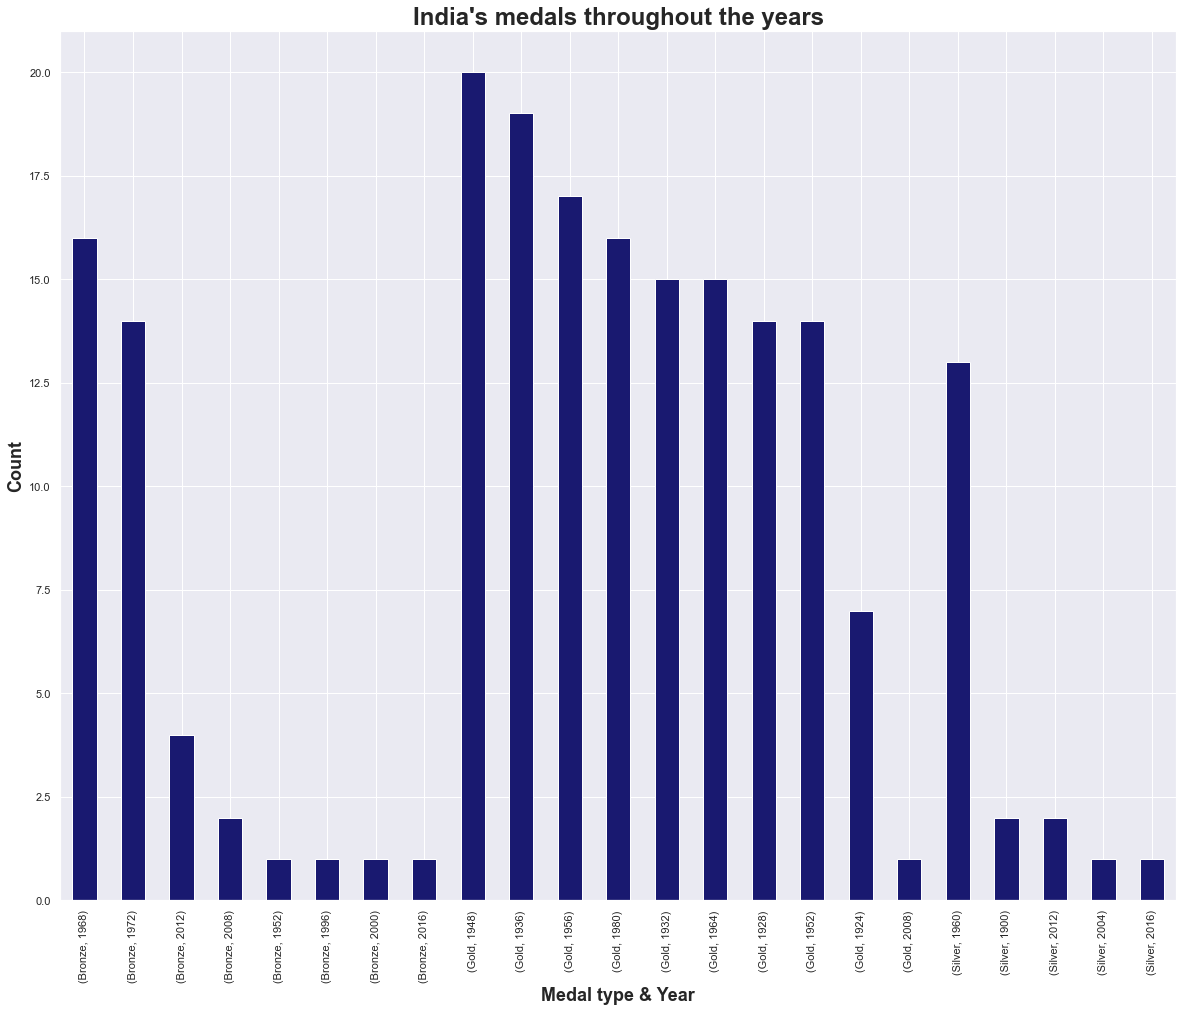

In [20]:
plt.figure(figsize=(20,16))
india_medals.plot(kind = 'bar',
                  color = 'midnightblue')
plt.title('India\'s medals throughout the years', fontsize = 24, weight = 'bold')
plt.xlabel('Medal type & Year', fontsize = 18, weight = 'bold')
plt.ylabel('Count', fontsize = 18, weight = 'bold')
plt.show();

>In 1948 India won an impressive 20 gold medals.
 
>There is a decreasing trend in the last years

In [21]:
#Calculating how many males and females for every participation.. 
india_gender = india_df.groupby('sex')['year'].value_counts()
india_gender

sex  year
F    2016     62
     2004     30
     2008     29
     2012     29
     2000     23
     1980     17
     1988     11
     1984     10
     1996      9
     1952      7
     1992      7
     1924      2
     2006      2
     1956      1
     1964      1
     1972      1
M    1964    111
     1948     89
     1952     87
     1956     78
     2016     68
     2012     62
     1980     61
     1992     58
     2004     51
     1960     49
     1988     47
     2000     47
     1996     45
     1984     43
     1972     42
     2008     38
     1936     30
     1968     30
     1932     26
     1976     26
     1924     25
     1928     24
     1920      7
     1900      5
     2006      3
     2010      3
     2014      2
     1998      1
     2002      1
Name: year, dtype: int64

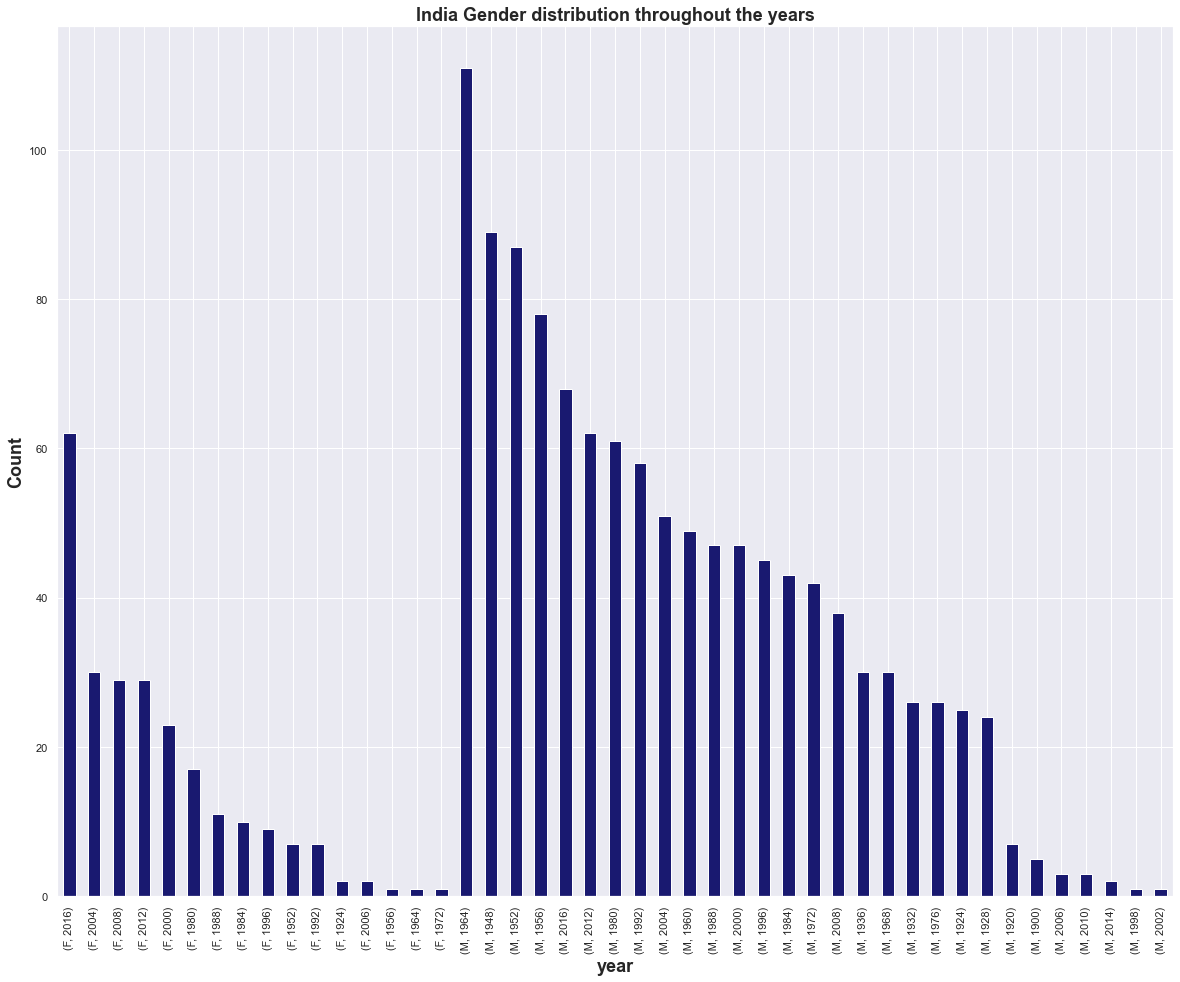

In [22]:
plt.figure(figsize=(20,16))
india_gender.plot(kind = 'bar',
                  color = 'midnightblue')
plt.title('India Gender distribution throughout the years', fontsize = 18, weight = 'bold')
plt.xlabel('year', fontsize = 18, weight = 'bold')
plt.ylabel('Count', fontsize = 18, weight = 'bold')
plt.show();

>The number of indian women participating in the olympics has increased in the recent years, there highest participation was in 2016 with 62 participant compared to 68 indian male participant.

>In 1964 the number of males participants was 111 compared to only one female 

# Japan details

In [23]:
#Creating a dataframe that only contains Japan..
japan_df = df.query('team == "Japan"')

In [24]:
japan_df

,name,sex,age,height,weight,team,noc,year,season,city,sport,medal,region
625,Isao Ko Abe,M,24.0,177.0,75.0,Japan,JPN,1936,Summer,Berlin,Athletics,NaN,Japan
629,Kazumi Abe,M,28.0,178.0,67.0,Japan,JPN,1976,Winter,Innsbruck,Bobsleigh,NaN,Japan
630,Kazuo Abe,M,25.0,166.0,69.0,Japan,JPN,1960,Summer,Roma,Wrestling,NaN,Japan
631,Kinya Abe,M,23.0,168.0,68.0,Japan,JPN,1992,Summer,Barcelona,Fencing,NaN,Japan
632,Kiyoshi Abe,M,25.0,167.0,62.0,Japan,JPN,1972,Summer,Munich,Wrestling,NaN,Japan
...,...,...,...,...,...,...,...,...,...,...,...,...,...
266953,Tsuneya Yuzaki,M,19.0,174.0,67.0,Japan,JPN,1960,Summer,Roma,Hockey,NaN,Japan
266954,Tsuneya Yuzaki,M,23.0,174.0,67.0,Japan,JPN,1964,Summer,Tokyo,Hockey,NaN,Japan
266955,Tsuneya Yuzaki,M,27.0,174.0,67.0,Japan,JPN,1968,Summer,Mexico City,Hockey,NaN,Japan
266957,Ryo Yuzawa,M,27.0,175.0,76.0,Japan,JPN,2004,Summer,Athina,Table Tennis,NaN,Japan


In [25]:
#Calculating the number of medals Japan won through the years..
japan_medals = japan_df.groupby('medal')['year'].value_counts()
japan_medals 

medal   year
Bronze  2004    52
        1992    43
        2016    34
        2012    33
        1984    31
                ..
Silver  1920     3
        1988     3
        1980     1
        1998     1
        2002     1
Name: year, Length: 74, dtype: int64

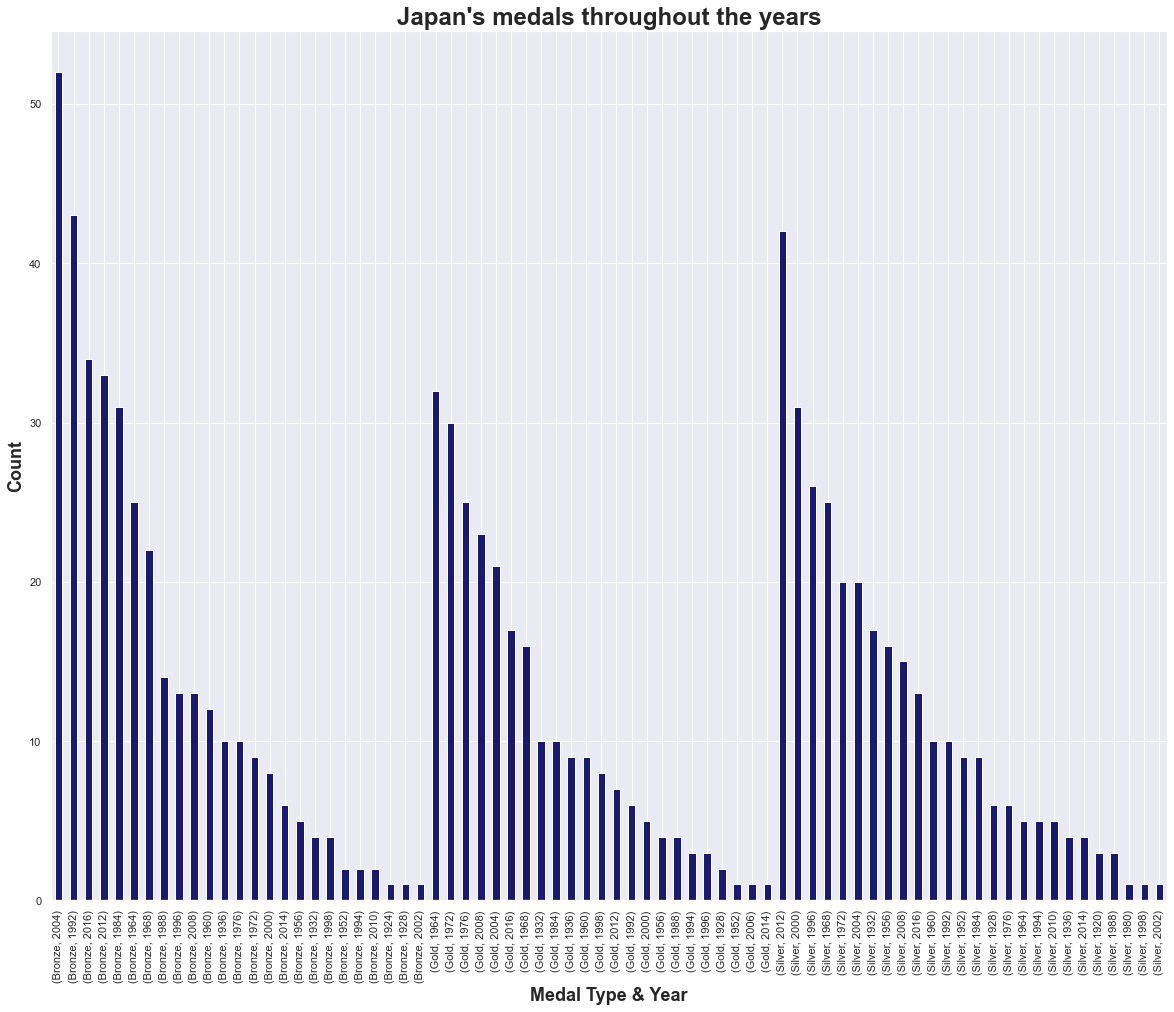

In [26]:
plt.figure(figsize=(20,16))
japan_medals.plot(kind = 'bar',
                  color = 'midnightblue')
plt.title('Japan\'s medals throughout the years', fontsize = 24, weight = 'bold')
plt.xlabel('Medal Type & Year', fontsize = 18, weight = 'bold')
plt.ylabel('Count', fontsize = 18, weight = 'bold')
plt.show();

> In 2004, Japan won 52 Bronze medals as its highest Bronze medals in one year. In 1964, they won 32 Gold medals as its highest Gold medals in one year. In 2014, they won 42 Gold medals as its highest Silver medals in one year.

In [27]:
#Calculating how many males and females for every participation..
japan_gender = japan_df.groupby('sex')['year'].value_counts()
japan_gender 

sex  year
F    2008    218
     2016    209
     1996    205
     2004    196
     2012    196
     1992    169
     1988    160
     2000    125
     1976    119
     1972    118
     1964    117
     1984    117
     1998    102
     2014     96
     2002     88
     2006     87
     1968     84
     1960     73
     2010     72
     1956     58
     1994     36
     1932     27
     1936     27
     1952     17
     1980      9
     1928      2
M    1964    414
     1988    357
     1936    344
     1992    337
     1984    319
     1968    300
     1972    293
     1976    292
     1960    273
     2008    228
     1996    227
     2016    227
     2000    222
     1932    209
     2004    206
     2012    199
     1956    190
     1952    141
     1998    131
     2002    111
     2006    103
     1994     85
     2010     81
     2014     75
     1980     71
     1928     64
     1924     33
     1920     26
     1912      4
Name: year, dtype: int64

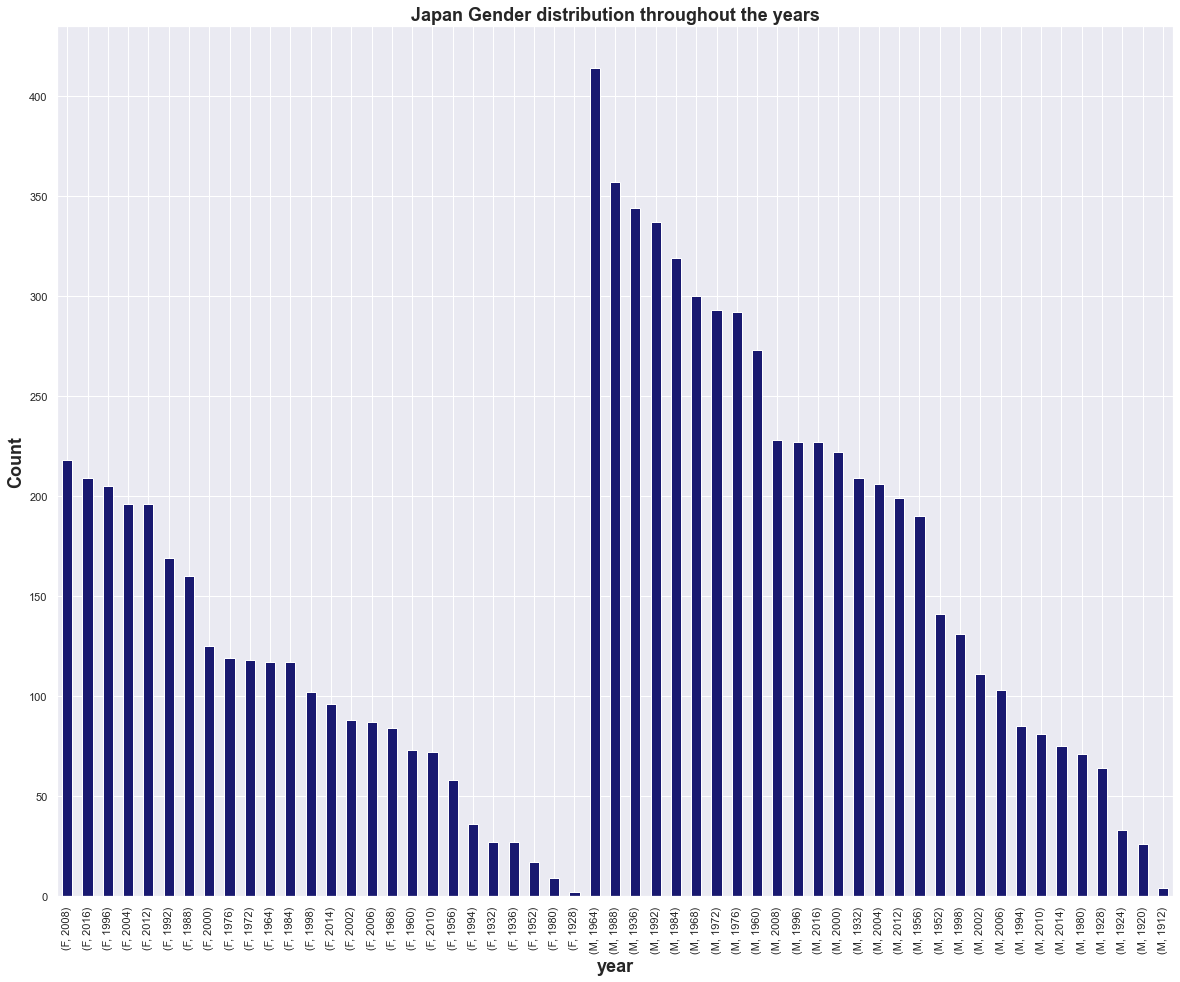

In [28]:
plt.figure(figsize=(20,16))
japan_gender.plot(kind = 'bar',
                  color = 'midnightblue')
plt.title('Japan Gender distribution throughout the years', fontsize = 18, weight = 'bold')
plt.xlabel('year', fontsize = 18, weight = 'bold')
plt.ylabel('Count', fontsize = 18, weight = 'bold')
plt.show();

>In 2008, Japanese females made their best participation with 218, while the males best participation was in 1964 with 414.

# Top 10 Participating Countries

In [29]:
df.head(1)

,name,sex,age,height,weight,team,noc,year,season,city,sport,medal,region
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992,Summer,Barcelona,Basketball,NaN,China


In [30]:
#Calculating the top 10 participants through the years
top_10 = df.groupby('team')['year'].count().sort_values(ascending = False).head(10)
top_10

team
United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
Canada            9279
Japan             8289
Sweden            8052
Australia         7513
Hungary           6547
Name: year, dtype: int64

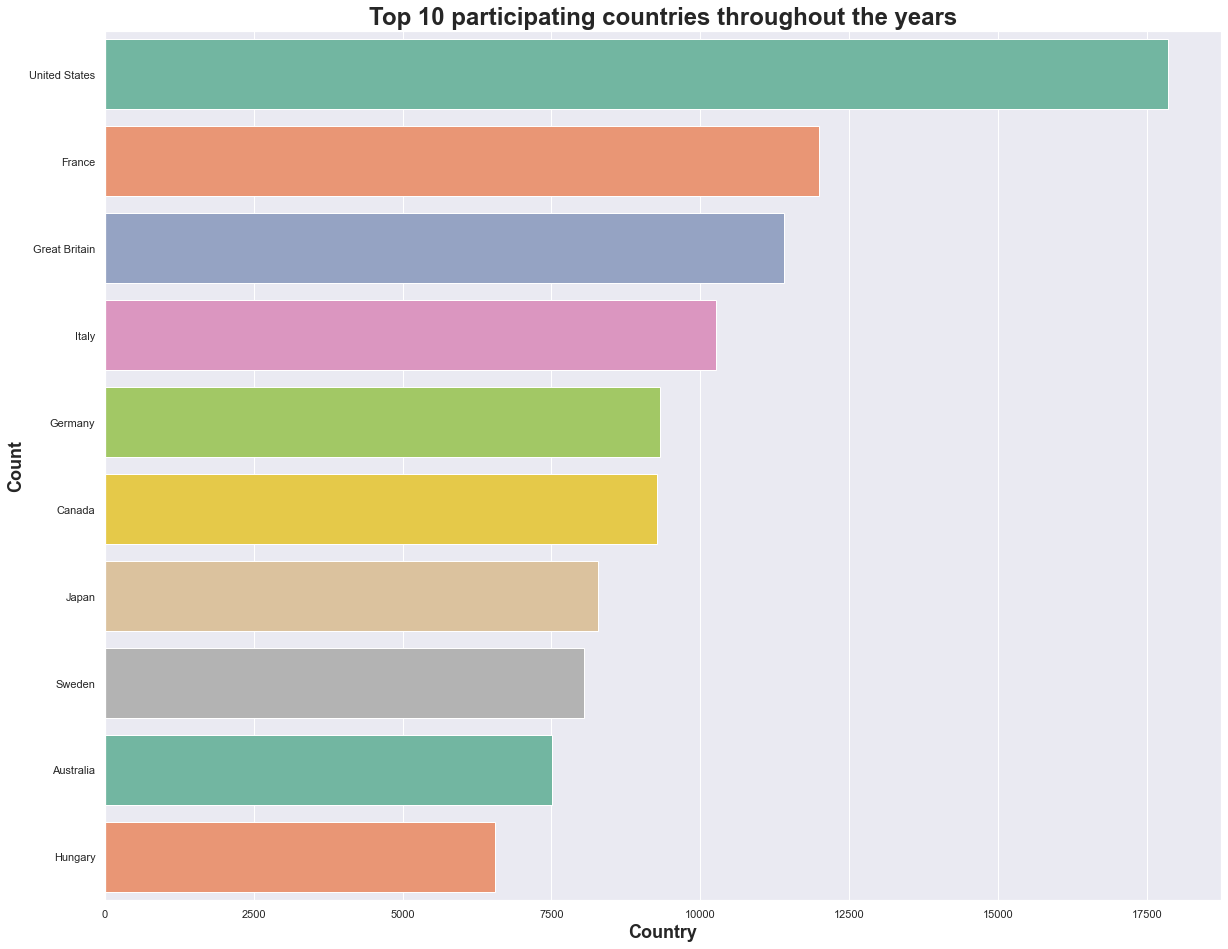

In [31]:
plt.figure(figsize=(20,16))
sns.barplot(x = top_10, y = top_10.index, palette='Set2')
plt.title('Top 10 participating countries throughout the years', fontsize = 24, weight = 'bold')
plt.xlabel('Country', fontsize = 18, weight = 'bold')
plt.ylabel('Count', fontsize = 18, weight = 'bold')
plt.show();

>The United States is leading the charts with 17847 participants followed by France, Great Britain and Italy

# Age Distribution of participants

In [32]:
df.head(1)

,name,sex,age,height,weight,team,noc,year,season,city,sport,medal,region
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992,Summer,Barcelona,Basketball,NaN,China


In [33]:
age_dist = df['age'].value_counts().head(30)

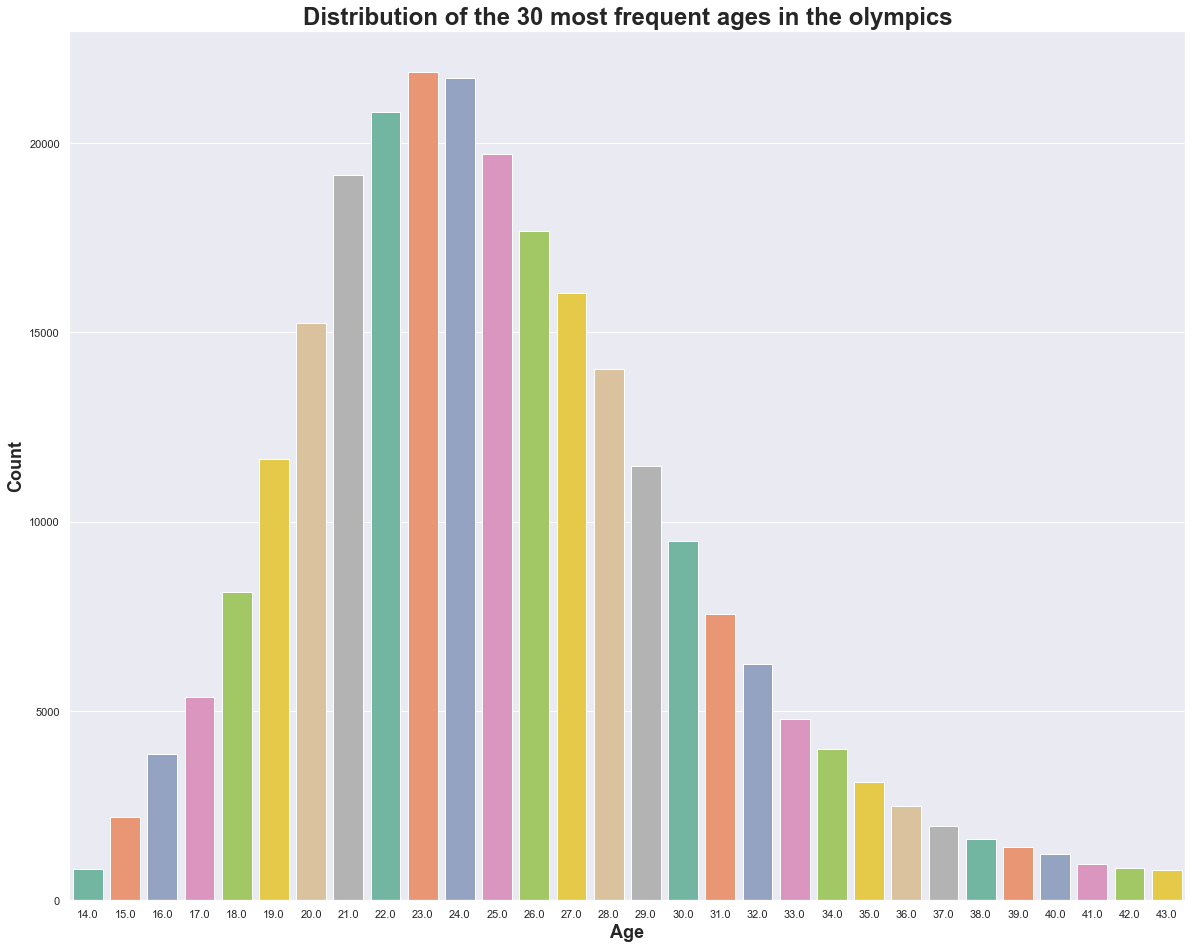

In [34]:
plt.figure(figsize=(20,16))
sns.barplot(x = age_dist.index, y = age_dist, palette='Set2')
plt.title('Distribution of the 30 most frequent ages in the olympics', fontsize = 24, weight = 'bold')
plt.xlabel('Age', fontsize = 18, weight = 'bold')
plt.ylabel('Count', fontsize = 18, weight = 'bold')
plt.show();

>Ages between the 20 and 27 are the most frequent throughout all participants.

# Another Distribution:

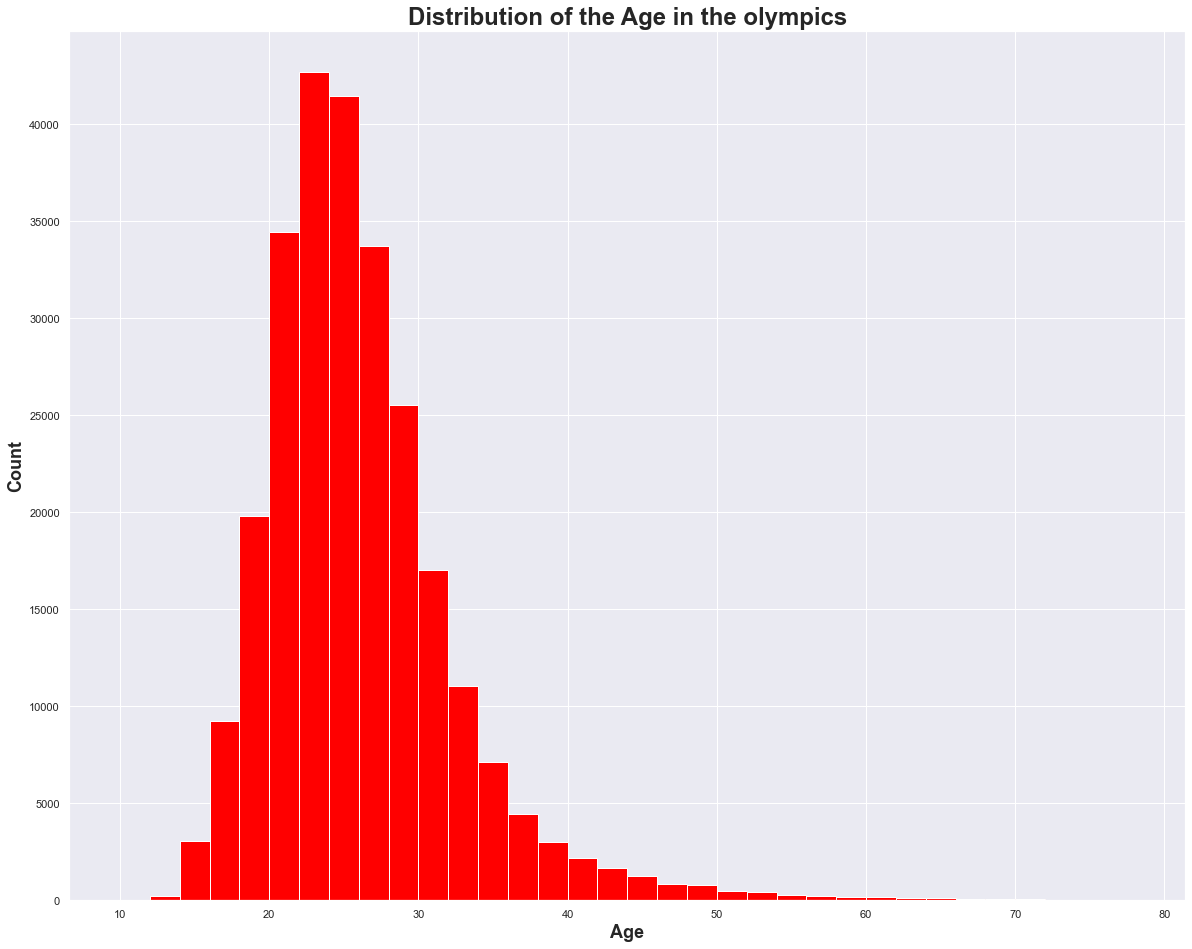

In [35]:
plt.figure(figsize=(20,16))
plt.hist(df['age'], bins= np.arange(10,80,2), color = 'red', edgecolor = 'white' )
plt.title('Distribution of the Age in the olympics', fontsize = 24, weight = 'bold')
plt.xlabel('Age', fontsize = 18, weight = 'bold')
plt.ylabel('Count', fontsize = 18, weight = 'bold')
plt.show();

 # 

# Winter Sports

In [36]:
df.head(10)

,name,sex,age,height,weight,team,noc,year,season,city,sport,medal,region
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992,Summer,Barcelona,Basketball,NaN,China
1,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012,Summer,London,Judo,NaN,China
2,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920,Summer,Antwerpen,Football,NaN,Denmark
3,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Gold,Denmark
4,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988,Winter,Calgary,Speed Skating,NaN,Netherlands
5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988,Winter,Calgary,Speed Skating,NaN,Netherlands
6,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992,Winter,Albertville,Speed Skating,NaN,Netherlands
7,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992,Winter,Albertville,Speed Skating,NaN,Netherlands
8,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994,Winter,Lillehammer,Speed Skating,NaN,Netherlands
9,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994,Winter,Lillehammer,Speed Skating,NaN,Netherlands


In [37]:
#Creating a winter dataframe ..
winter_df = df[df['season'] == 'Winter']

In [38]:
winter_df.head()

,name,sex,age,height,weight,team,noc,year,season,city,sport,medal,region
4,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988,Winter,Calgary,Speed Skating,NaN,Netherlands
5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988,Winter,Calgary,Speed Skating,NaN,Netherlands
6,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992,Winter,Albertville,Speed Skating,NaN,Netherlands
7,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992,Winter,Albertville,Speed Skating,NaN,Netherlands
8,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994,Winter,Lillehammer,Speed Skating,NaN,Netherlands


In [39]:
#Calculating the most frequent sports throughout the winter olympics..
winter_sports = winter_df.groupby('sport')['year'].count().sort_values(ascending = False)

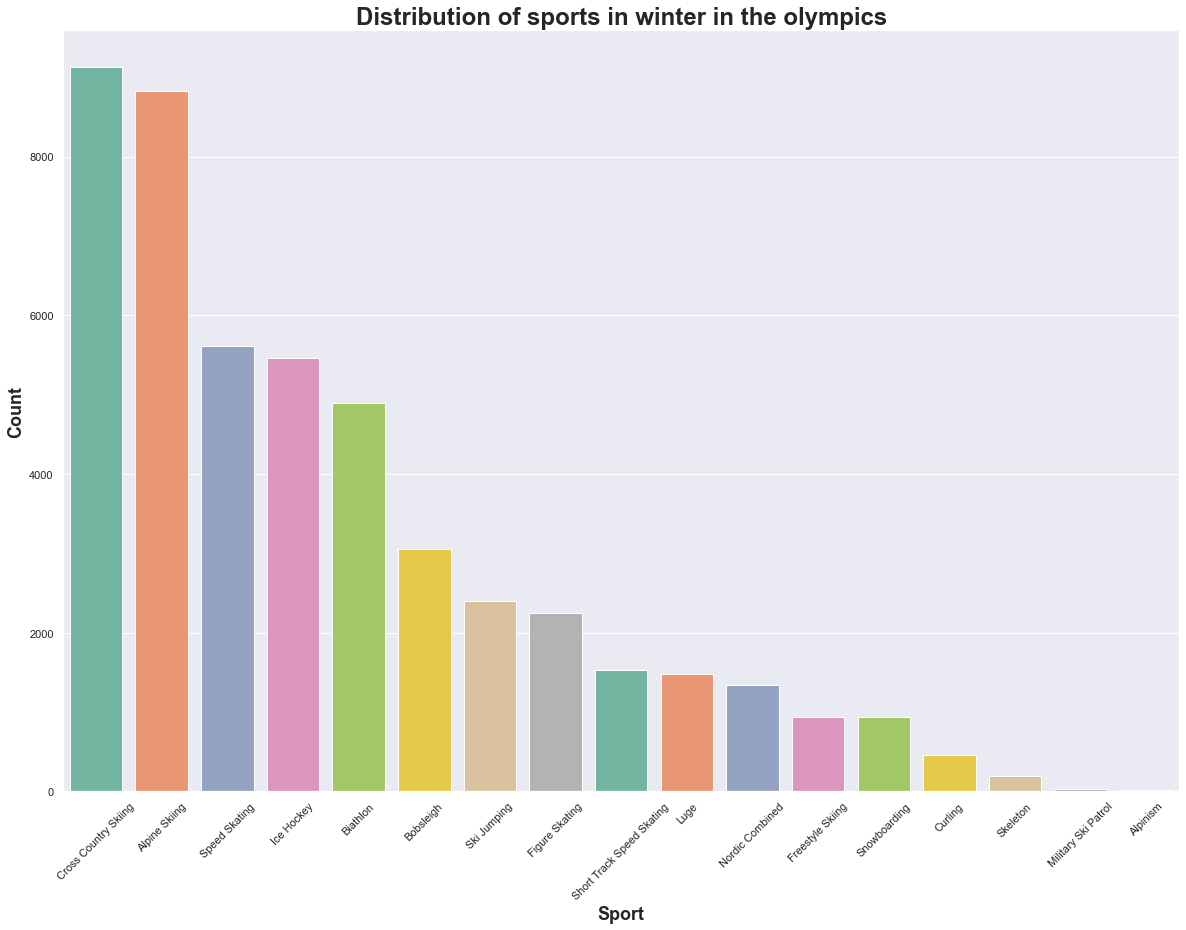

In [40]:
plt.figure(figsize=(20,14))
sns.barplot(x = winter_sports.index, y = winter_sports, palette='Set2')
plt.title('Distribution of sports in winter in the olympics', fontsize = 24, weight = 'bold')
plt.xlabel('Sport', fontsize = 18, weight = 'bold')
plt.ylabel('Count', fontsize = 18, weight = 'bold')
plt.xticks(rotation = 45)
plt.show();

> Cross Country Skiing and Alpine Skiing are leading the sports of the winter olympics, followed by Speed Skating, Ice Hockey and Biathlon 

# Summer Sports

In [41]:
#Creating a summer dataframe..
summer_df = df[df['season'] == 'Summer']

In [42]:
#Calculating the most frequent sports throughout the Summer olympics..
summer_sports = summer_df.groupby('sport')['year'].count().sort_values(ascending = False).head(30)

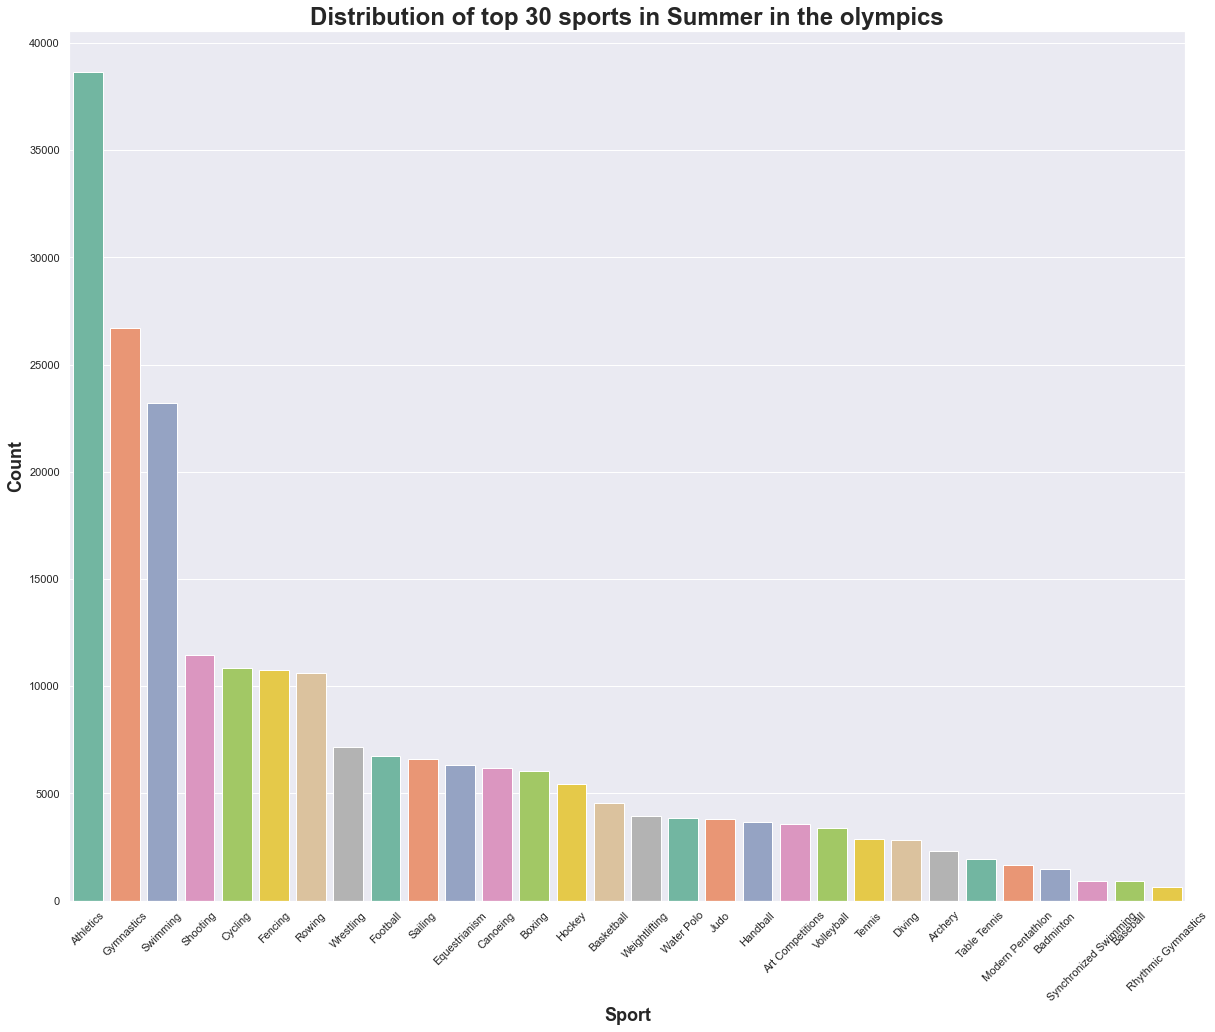

In [43]:
plt.figure(figsize=(20,16))
sns.barplot(x = summer_sports.index, y = summer_sports, palette='Set2')
plt.title('Distribution of top 30 sports in Summer in the olympics', fontsize = 24, weight = 'bold')
plt.xlabel('Sport', fontsize = 18, weight = 'bold')
plt.ylabel('Count', fontsize = 18, weight = 'bold')
plt.xticks(rotation = 45)
plt.show();

>Athletics, Gymnastics and Swimming are by far the most frequent sports in the summer Olympics

# Male and Female Participants

In [44]:
df.head(1)

,name,sex,age,height,weight,team,noc,year,season,city,sport,medal,region
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992,Summer,Barcelona,Basketball,NaN,China


In [45]:
gender_olympics = df.groupby('sex')['year'].count().sort_values(ascending = False)
gender_olympics

sex
M    196594
F     74522
Name: year, dtype: int64

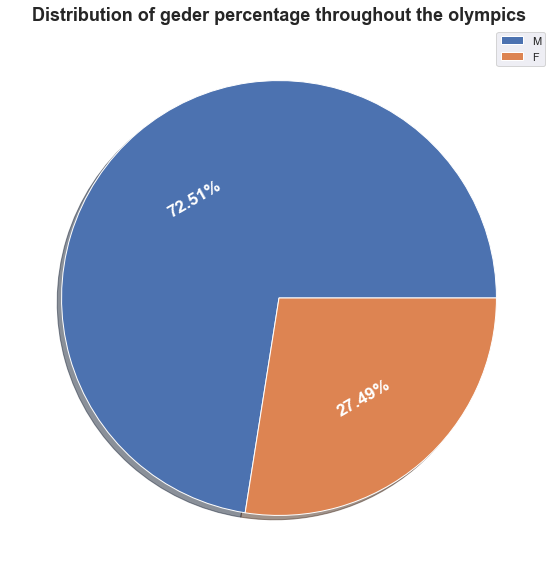

In [46]:
plt.figure(figsize=(14,10))
plt.pie(gender_olympics, labels=gender_olympics.index, autopct= '%.2f%%', shadow =True,
        textprops= {'size':'x-large',
                    'fontweight': 'bold',
                    'rotation': "30",
                    'color':'w'})
plt.title('Distribution of geder percentage throughout the olympics', fontsize = 18, fontweight = 'bold')     
plt.legend()
plt.show()

>Men are obviously more represented in the olympics with 72.51%

# Which country has won the most medals?

In [47]:
df.head(2)

,name,sex,age,height,weight,team,noc,year,season,city,sport,medal,region
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992,Summer,Barcelona,Basketball,NaN,China
1,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012,Summer,London,Judo,NaN,China


In [48]:
df['medal'].unique()

array([nan, 'Gold', 'Bronze', 'Silver'], dtype=object)

#  Gold

In [49]:
#Creating a gold medal dataframe
gold_df = df.query('medal == "Gold"')

In [50]:
gold_df.head(1)

,name,sex,age,height,weight,team,noc,year,season,city,sport,medal,region
3,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Gold,Denmark


In [51]:
top_3o_gold = gold_df.groupby('team')['year'].count().sort_values(ascending = False).head(30)
top_3o_gold

team
United States    2474
Soviet Union     1058
Germany           679
Italy             535
Great Britain     519
France            455
Sweden            451
Hungary           432
Canada            422
East Germany      369
Russia            366
Australia         342
China             308
Norway            299
Netherlands       277
Japan             247
South Korea       211
Finland           198
Denmark           168
Cuba              164
Romania           161
West Germany      155
Switzerland       144
India             138
Yugoslavia        130
Unified Team      123
Poland            117
Spain             108
Brazil            103
Austria            95
Name: year, dtype: int64

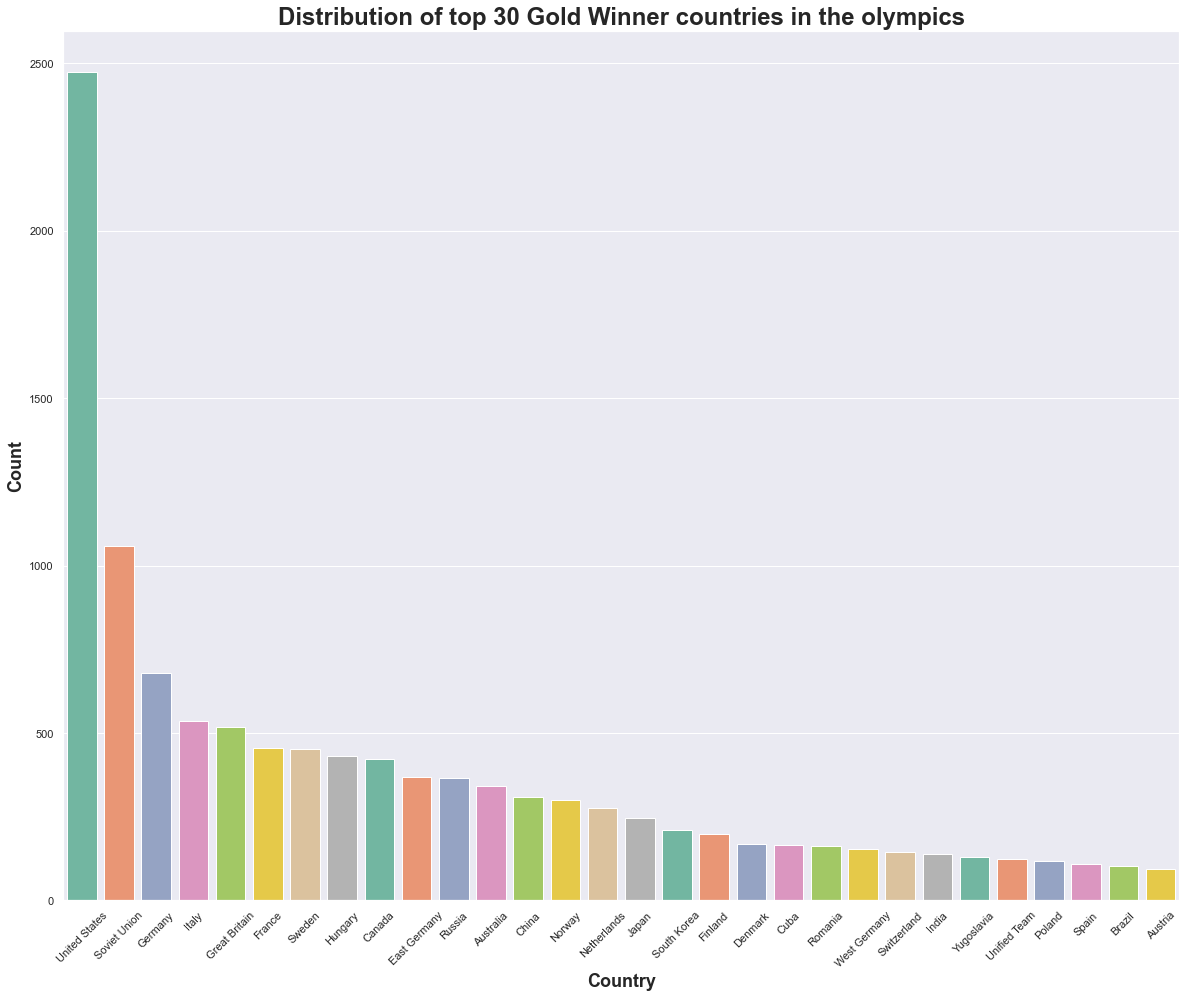

In [52]:
plt.figure(figsize=(20,16))
sns.barplot(x = top_3o_gold.index, y = top_3o_gold, palette='Set2')
plt.title('Distribution of top 30 Gold Winner countries in the olympics', fontsize = 24, weight = 'bold')
plt.xlabel('Country', fontsize = 18, weight = 'bold')
plt.ylabel('Count', fontsize = 18, weight = 'bold')
plt.xticks(rotation = 45)
plt.show();

> The United States has won 2474 gold medals, followed by the Soviet Union with 1058 gold medals and Germany with 679 gold medals.

# Silver

In [53]:
#Creating a Silver Dataframe
silver_df = df.query('medal == "Silver"')

In [54]:
silver_df.head(1)

,name,sex,age,height,weight,team,noc,year,season,city,sport,medal,region
63,Kjetil Andr Aamodt,M,22.0,176.0,85.0,Norway,NOR,1994,Winter,Lillehammer,Alpine Skiing,Silver,Norway


In [55]:
top_3o_silver = silver_df.groupby('team')['year'].count().sort_values(ascending = False).head(30)
top_3o_silver

team
United States     1512
Soviet Union       716
Germany            627
Great Britain      582
France             518
Italy              508
Sweden             476
Australia          453
Canada             413
Russia             351
Hungary            330
Norway             330
China              325
Netherlands        321
East Germany       309
Japan              307
Finland            263
Spain              239
Czechoslovakia     223
Denmark            223
South Korea        222
Switzerland        213
Romania            200
Poland             193
West Germany       184
Austria            168
Yugoslavia         167
Belgium            161
Brazil             161
Bulgaria           144
Name: year, dtype: int64

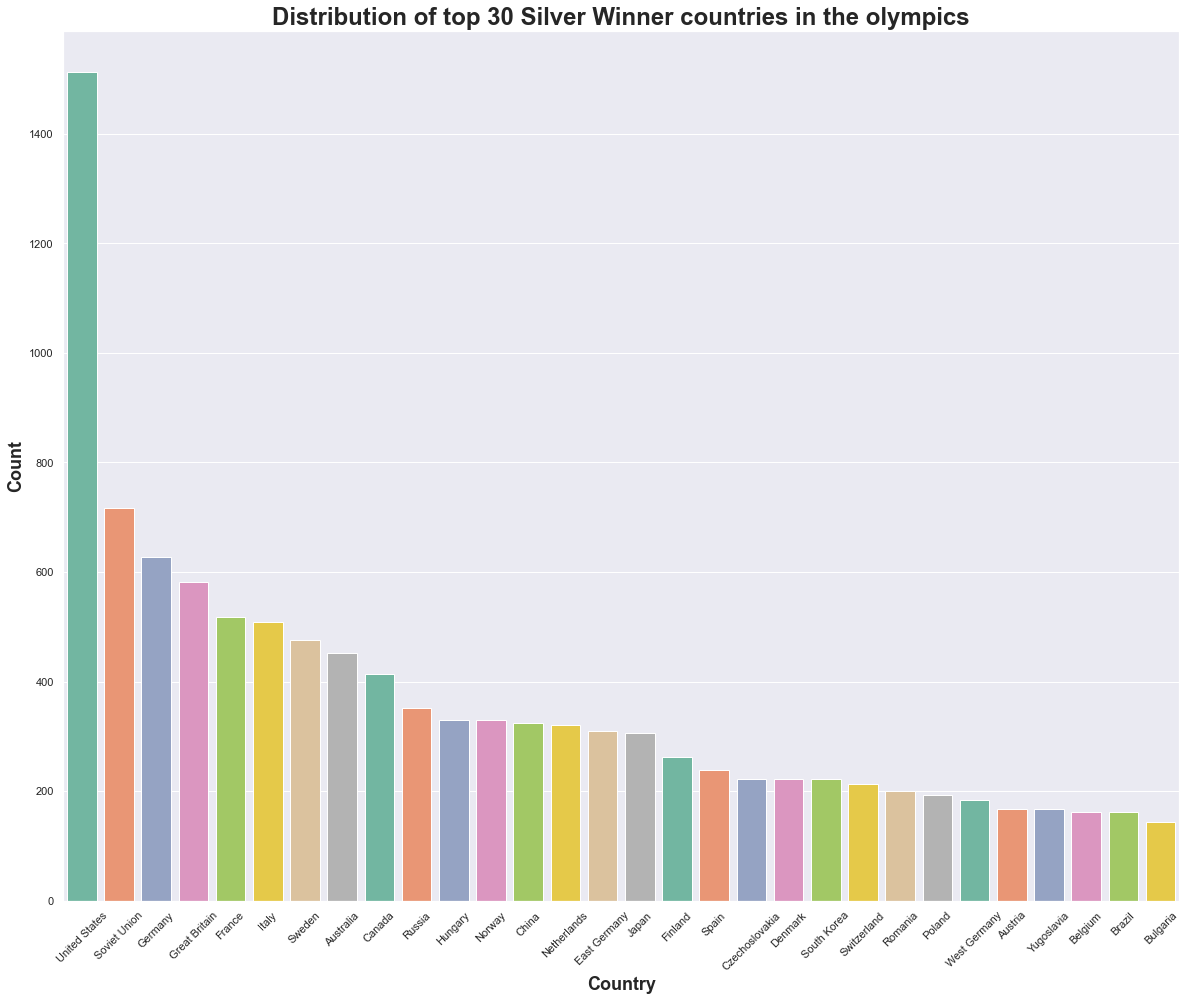

In [56]:
plt.figure(figsize=(20,16))
sns.barplot(x = top_3o_silver.index, y = top_3o_silver, palette='Set2')
plt.title('Distribution of top 30 Silver Winner countries in the olympics', fontsize = 24, weight = 'bold')
plt.xlabel('Country', fontsize = 18, weight = 'bold')
plt.ylabel('Count', fontsize = 18, weight = 'bold')
plt.xticks(rotation = 45)
plt.show();

> The United States has won 1512 Silver medals, followed by the Soviet Union with 716 Silver medals and Germany with 627 Silver medals.

# Bronze

In [57]:
bronze_df = df.query('medal == "Bronze"')

In [58]:
bronze_df.head(1)

,name,sex,age,height,weight,team,noc,year,season,city,sport,medal,region
37,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920,Summer,Antwerpen,Swimming,Bronze,Finland


In [59]:
top_3o_bronze = silver_df.groupby('team')['year'].count().sort_values(ascending = False).head(30)
top_3o_bronze

team
United States     1512
Soviet Union       716
Germany            627
Great Britain      582
France             518
Italy              508
Sweden             476
Australia          453
Canada             413
Russia             351
Hungary            330
Norway             330
China              325
Netherlands        321
East Germany       309
Japan              307
Finland            263
Spain              239
Czechoslovakia     223
Denmark            223
South Korea        222
Switzerland        213
Romania            200
Poland             193
West Germany       184
Austria            168
Yugoslavia         167
Belgium            161
Brazil             161
Bulgaria           144
Name: year, dtype: int64

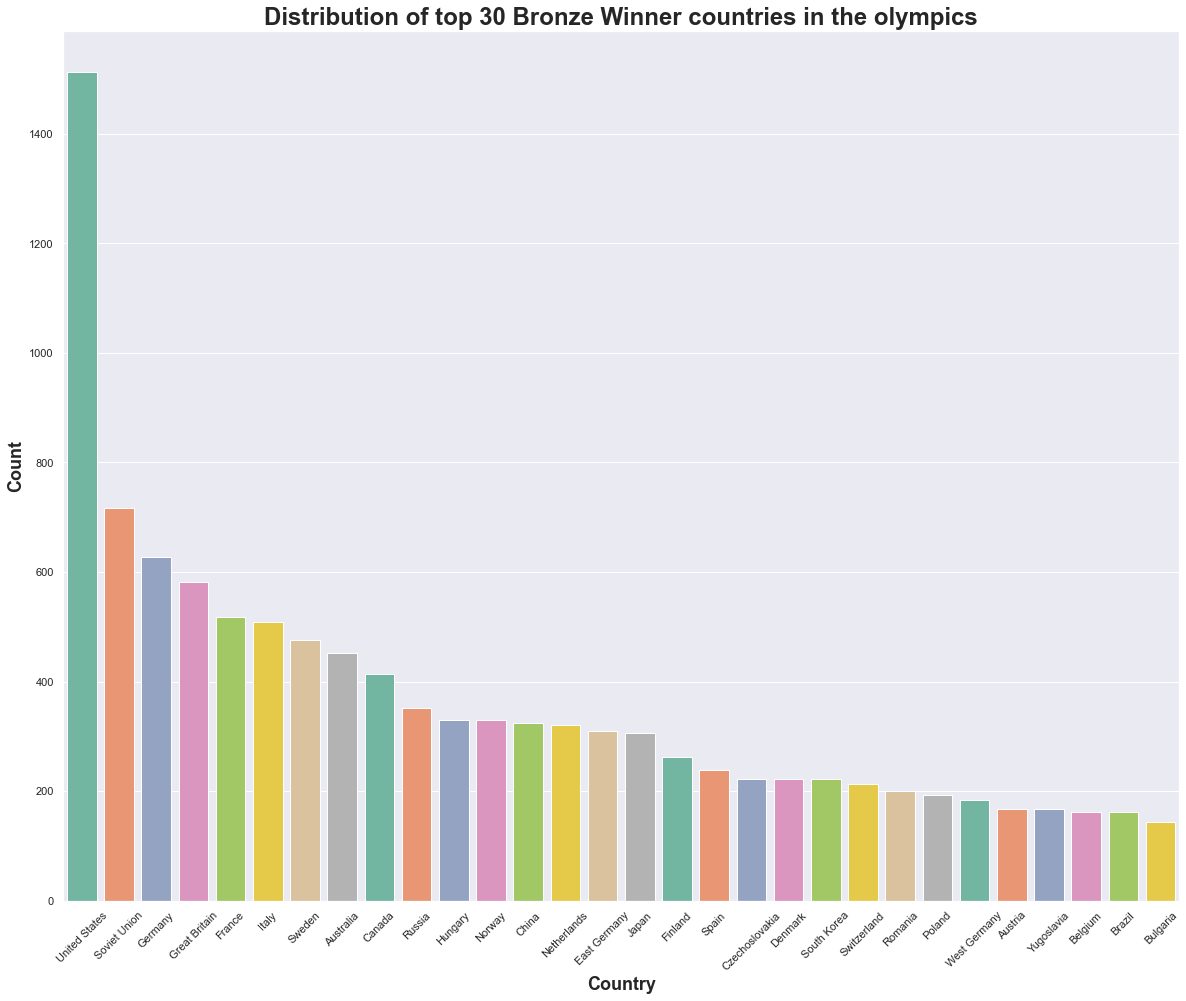

In [60]:
plt.figure(figsize=(20,16))
sns.barplot(x = top_3o_bronze.index, y = top_3o_bronze, palette='Set2')
plt.title('Distribution of top 30 Bronze Winner countries in the olympics', fontsize = 24, weight = 'bold')
plt.xlabel('Country', fontsize = 18, weight = 'bold')
plt.ylabel('Count', fontsize = 18, weight = 'bold')
plt.xticks(rotation = 45)
plt.show();

>The United States has won 1233 Bronze medals, followed by the Soviet Union with 678 Bronze medals and Germany with 677 Bronze medals.

# Total Number of female atheletes in each Summer Olympics

In [61]:
df.head(1)

,name,sex,age,height,weight,team,noc,year,season,city,sport,medal,region
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992,Summer,Barcelona,Basketball,NaN,China


In [62]:
df.sex.unique()

array(['M', 'F'], dtype=object)

In [63]:
#Creating a dataframe for both women and summer olympics
female_df = df[(df['sex'] == 'F') & (df['season'] == 'Summer')]
female_df

,name,sex,age,height,weight,team,noc,year,season,city,sport,medal,region
26,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932,Summer,Los Angeles,Athletics,NaN,Netherlands
27,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932,Summer,Los Angeles,Athletics,NaN,Netherlands
32,Minna Maarit Aalto,F,30.0,159.0,55.5,Finland,FIN,1996,Summer,Atlanta,Sailing,NaN,Finland
33,Minna Maarit Aalto,F,34.0,159.0,55.5,Finland,FIN,2000,Summer,Sydney,Sailing,NaN,Finland
79,Ragnhild Margrethe Aamodt,F,27.0,163.0,NaN,Norway,NOR,2008,Summer,Beijing,Handball,Gold,Norway
...,...,...,...,...,...,...,...,...,...,...,...,...,...
271080,Galina Ivanovna Zybina (-Fyodorova),F,33.0,168.0,80.0,Soviet Union,URS,1964,Summer,Tokyo,Athletics,Bronze,Russia
271099,Stavroula Zygouri,F,36.0,171.0,63.0,Greece,GRE,2004,Summer,Athina,Wrestling,NaN,Greece
271102,Olesya Nikolayevna Zykina,F,19.0,171.0,64.0,Russia,RUS,2000,Summer,Sydney,Athletics,Bronze,Russia
271103,Olesya Nikolayevna Zykina,F,23.0,171.0,64.0,Russia,RUS,2004,Summer,Athina,Athletics,Silver,Russia


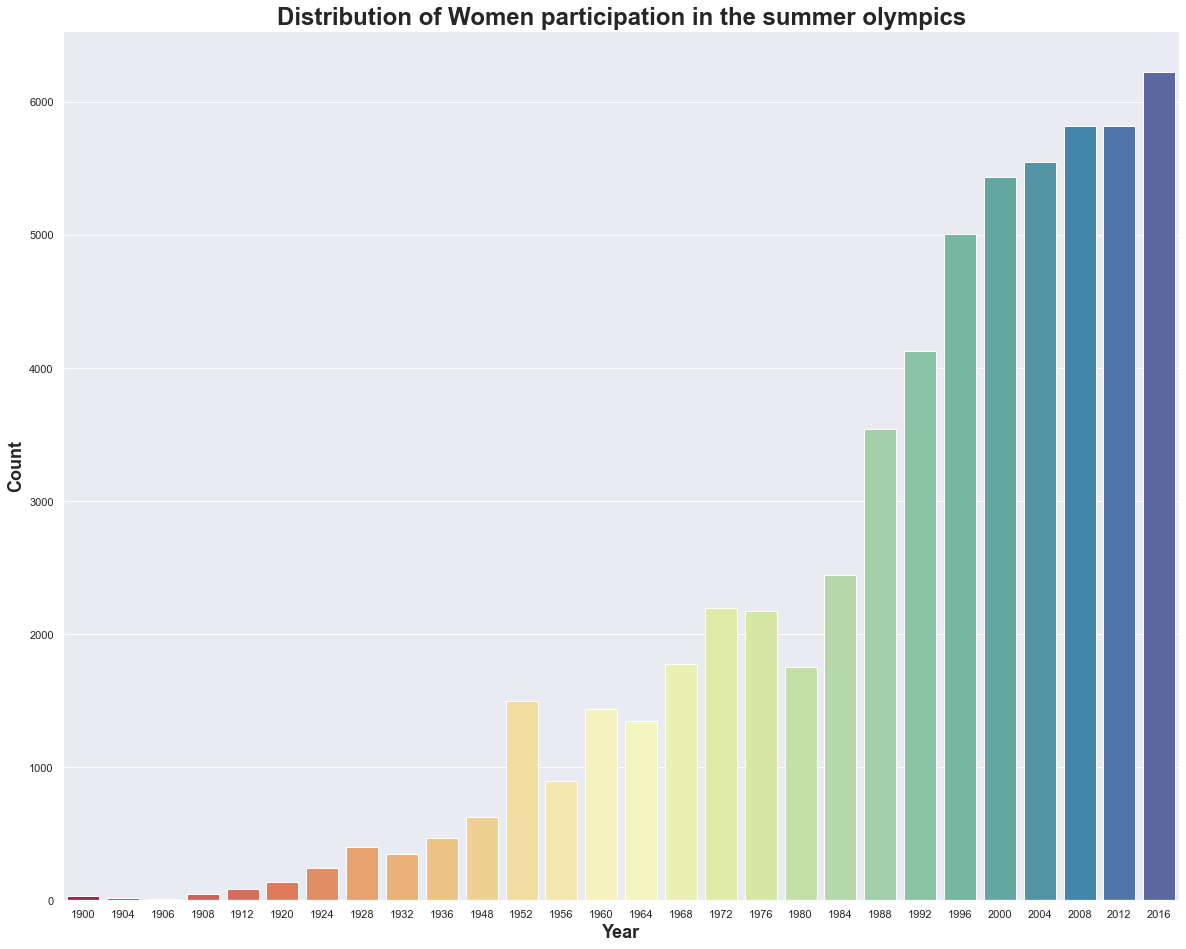

In [64]:
sns.set_style('darkgrid')
plt.figure(figsize=(20,16))
sns.countplot(x = 'year', data =female_df, palette='Spectral' )
plt.title('Distribution of Women participation in the summer olympics', fontsize = 24, weight = 'bold')
plt.xlabel('Year', fontsize = 18, weight = 'bold')
plt.ylabel('Count', fontsize = 18, weight = 'bold')
plt.show();

>Since 1992, there is an increasing trend of the number of women participating in the summer olympics

In [65]:
women_summer = female_df.groupby('year')['sex'].value_counts()
women_summer

year  sex
1900  F        33
1904  F        16
1906  F        11
1908  F        47
1912  F        87
1920  F       134
1924  F       244
1928  F       404
1932  F       347
1936  F       468
1948  F       628
1952  F      1497
1956  F       893
1960  F      1435
1964  F      1348
1968  F      1777
1972  F      2193
1976  F      2172
1980  F      1756
1984  F      2447
1988  F      3543
1992  F      4124
1996  F      5008
2000  F      5431
2004  F      5546
2008  F      5816
2012  F      5815
2016  F      6223
Name: sex, dtype: int64

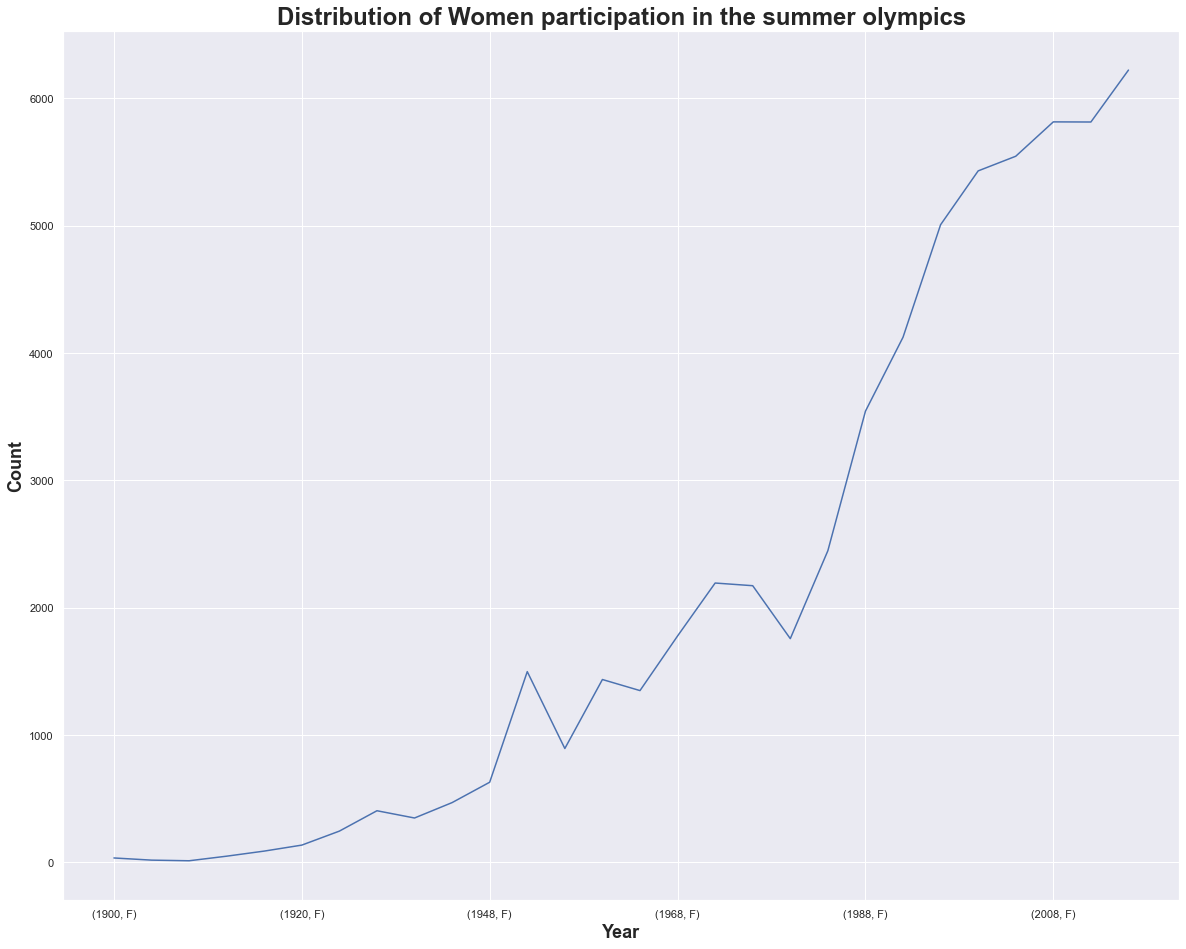

In [66]:
sns.set_style('darkgrid')
plt.figure(figsize=(20,16))
women_summer.plot()
plt.title('Distribution of Women participation in the summer olympics', fontsize = 24, weight = 'bold')
plt.xlabel('Year', fontsize = 18, weight = 'bold')
plt.ylabel('Count', fontsize = 18, weight = 'bold')
plt.show();

# Top 10 atheletes with gold medals

In [67]:
df.head(1)

,name,sex,age,height,weight,team,noc,year,season,city,sport,medal,region
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992,Summer,Barcelona,Basketball,NaN,China


In [68]:
#Using the gold dataframe
gold_df.head(1)

,name,sex,age,height,weight,team,noc,year,season,city,sport,medal,region
3,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Gold,Denmark


In [69]:
#Calculating athletes with highest gold medals..
gold_atheletes = gold_df.groupby('name')['region'].count().sort_values(ascending = False).head(20)
gold_atheletes

name
Michael Fred Phelps, II                            23
Raymond Clarence "Ray" Ewry                        10
Paavo Johannes Nurmi                                9
Larysa Semenivna Latynina (Diriy-)                  9
Mark Andrew Spitz                                   9
Frederick Carlton "Carl" Lewis                      9
Jennifer Elisabeth "Jenny" Thompson (-Cumpelik)     8
Birgit Fischer-Schmidt                              8
Matthew Nicholas "Matt" Biondi                      8
Sawao Kato                                          8
Ole Einar Bjrndalen                                 8
Usain St. Leo Bolt                                  8
Nikolay Yefimovich Andrianov                        7
Borys Anfiyanovych Shakhlin                         7
Vra slavsk (-Odloilov)                              7
Donald Arthur "Don" Schollander                     7
Viktor Ivanovych Chukarin                           7
Aladr Gerevich (-Gerei)                             7
Rudolf Krpti           

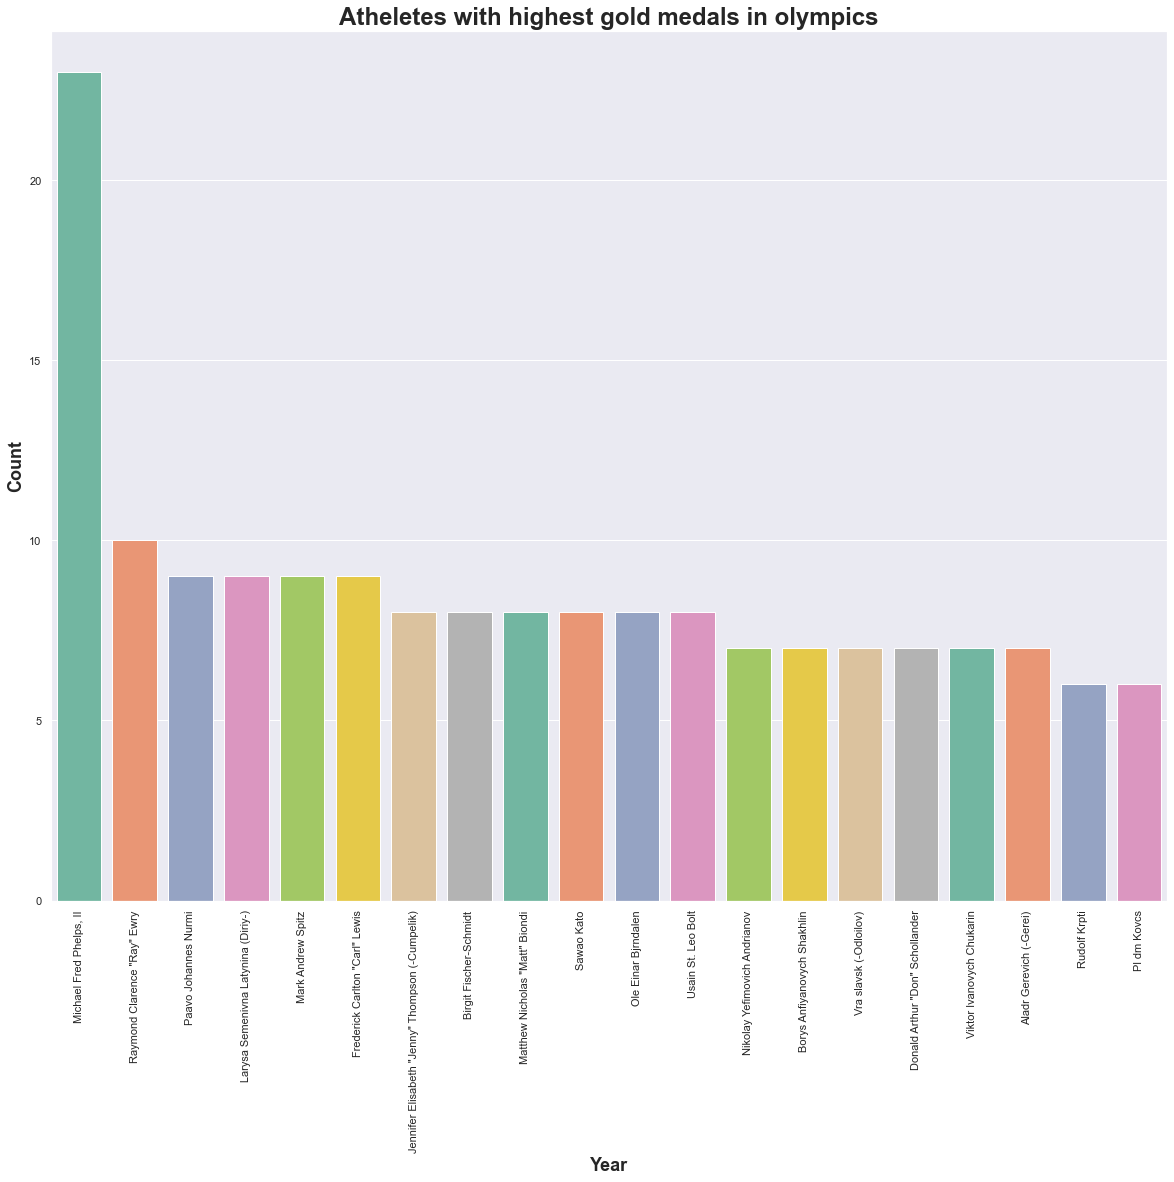

In [70]:
sns.set_style('darkgrid')
plt.figure(figsize=(20,16))
sns.barplot(x = gold_atheletes.index, y =gold_atheletes, palette='Set2' )
plt.title('Atheletes with highest gold medals in olympics', fontsize = 24, weight = 'bold')
plt.xlabel('Year', fontsize = 18, weight = 'bold')
plt.ylabel('Count', fontsize = 18, weight = 'bold')
plt.xticks(rotation = 90)
plt.show();

>Michael Fred Phelps, II has wan an impressive 23 medals, followed by Raymond Clarence "Ray" Ewry with 10 medals, and Paavo Johannes Nurmi, Larysa Semenivna Latynina (Diriy-), Mark Andrew Spitz, Frederick Carlton "Carl" Lewis all with 9 medals each.


# Are there any atheletes with gold medals at the age of 60?

In [71]:
gold_df.head(1)

,name,sex,age,height,weight,team,noc,year,season,city,sport,medal,region
3,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Gold,Denmark


In [72]:
gold_60 = gold_df[gold_df['age'] >= 60]
gold_60

,name,sex,age,height,weight,team,noc,year,season,city,sport,medal,region
104003,Isaac Lazarus Israls,M,63.0,NaN,NaN,Netherlands,NED,1928,Summer,Amsterdam,Art Competitions,Gold,Netherlands
105199,Charles Jacobus,M,64.0,NaN,NaN,United States,USA,1904,Summer,St. Louis,Roque,Gold,USA
159298,Joshua Kearney Millner,M,60.0,NaN,NaN,Great Britain,GBR,1908,Summer,London,Shooting,Gold,UK
190952,"Lida Peyton ""Eliza"" Pollock (McMillen-)",F,63.0,NaN,NaN,Cincinnati Archers,USA,1904,Summer,St. Louis,Archery,Gold,USA
226374,"Galen Carter ""G. C."" Spencer",M,63.0,165.0,NaN,Potomac Archers,USA,1904,Summer,St. Louis,Archery,Gold,USA
233386,Oscar Gomer Swahn,M,60.0,NaN,NaN,Sweden,SWE,1908,Summer,London,Shooting,Gold,Sweden
233387,Oscar Gomer Swahn,M,60.0,NaN,NaN,Sweden,SWE,1908,Summer,London,Shooting,Gold,Sweden
233390,Oscar Gomer Swahn,M,64.0,NaN,NaN,Sweden,SWE,1912,Summer,Stockholm,Shooting,Gold,Sweden
261102,"Robert W. Williams, Jr.",M,63.0,NaN,NaN,Potomac Archers,USA,1904,Summer,St. Louis,Archery,Gold,USA
261675,Walter Winans,M,60.0,NaN,NaN,United States,USA,1912,Summer,Stockholm,Art Competitions,Gold,USA


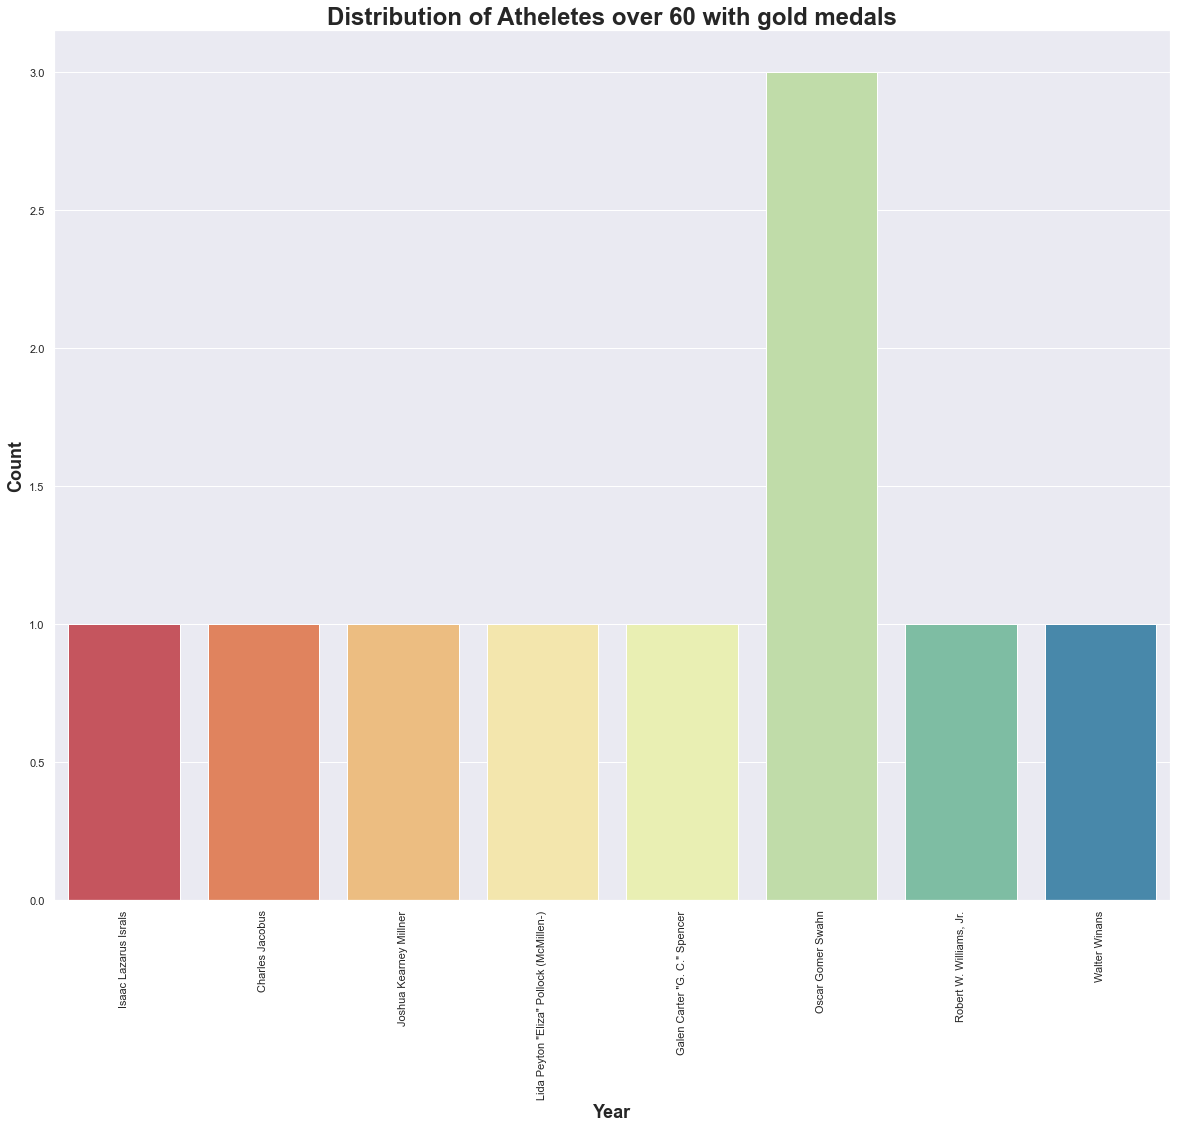

In [73]:
sns.set_style('darkgrid')
plt.figure(figsize=(20,16))
sns.countplot(x = 'name', data =gold_60, palette='Spectral' )
plt.title('Distribution of Atheletes over 60 with gold medals', fontsize = 24, weight = 'bold')
plt.xlabel('Year', fontsize = 18, weight = 'bold')
plt.ylabel('Count', fontsize = 18, weight = 'bold')
plt.xticks(rotation = 90)
plt.show();

>Oscar Gomer Swahn the swedish shooter, has won 3 gold medals after 60 years of age, Impressive!!

# Rio Olympics

In [74]:
df.head(1)

,name,sex,age,height,weight,team,noc,year,season,city,sport,medal,region
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992,Summer,Barcelona,Basketball,NaN,China


In [75]:
df.city.unique()

array(['Barcelona', 'London', 'Antwerpen', 'Paris', 'Calgary',
       'Albertville', 'Lillehammer', 'Los Angeles', 'Salt Lake City',
       'Helsinki', 'Lake Placid', 'Sydney', 'Atlanta', 'Stockholm',
       'Sochi', 'Nagano', 'Torino', 'Beijing', 'Rio de Janeiro', 'Athina',
       'Squaw Valley', 'Innsbruck', 'Sarajevo', 'Mexico City', 'Munich',
       'Seoul', 'Berlin', 'Oslo', "Cortina d'Ampezzo", 'Melbourne',
       'Roma', 'Amsterdam', 'Montreal', 'Moskva', 'Tokyo', 'Vancouver',
       'Grenoble', 'Sapporo', 'Chamonix', 'St. Louis', 'Sankt Moritz',
       'Garmisch-Partenkirchen'], dtype=object)

In [76]:
#Creating a dataframe for both Rio olympics and gold medals..
rio_gold_df = df[(df['city'] == 'Rio de Janeiro')&(df['medal'] == 'Gold')]
rio_gold_df.head(2)

,name,sex,age,height,weight,team,noc,year,season,city,sport,medal,region
1080,Ahmad Abughaush,M,20.0,178.0,68.0,Jordan,JOR,2016,Summer,Rio de Janeiro,Taekwondo,Gold,Jordan
1495,Nicola Virginia Adams,F,33.0,164.0,51.0,Great Britain,GBR,2016,Summer,Rio de Janeiro,Boxing,Gold,UK


In [77]:
rio_gold_df

,name,sex,age,height,weight,team,noc,year,season,city,sport,medal,region
1080,Ahmad Abughaush,M,20.0,178.0,68.0,Jordan,JOR,2016,Summer,Rio de Janeiro,Taekwondo,Gold,Jordan
1495,Nicola Virginia Adams,F,33.0,164.0,51.0,Great Britain,GBR,2016,Summer,Rio de Janeiro,Boxing,Gold,UK
1849,Nathan Ghar-Jun Adrian,M,27.0,198.0,100.0,United States,USA,2016,Summer,Rio de Janeiro,Swimming,Gold,USA
1850,Nathan Ghar-Jun Adrian,M,27.0,198.0,100.0,United States,USA,2016,Summer,Rio de Janeiro,Swimming,Gold,USA
2453,Tontowi Ahmad,M,29.0,179.0,72.0,Indonesia-1,INA,2016,Summer,Rio de Janeiro,Badminton,Gold,Indonesia
...,...,...,...,...,...,...,...,...,...,...,...,...,...
269277,Zheng Shuyin,F,22.0,188.0,75.0,China,CHN,2016,Summer,Rio de Janeiro,Taekwondo,Gold,China
269312,Viktoriya Yuryevna Zhilinskayte,F,27.0,188.0,80.0,Russia,RUS,2016,Summer,Rio de Janeiro,Handball,Gold,Russia
269368,Zhong Tianshi,F,25.0,168.0,62.0,China,CHN,2016,Summer,Rio de Janeiro,Cycling,Gold,China
269511,Zhu Ting,F,21.0,198.0,78.0,China,CHN,2016,Summer,Rio de Janeiro,Volleyball,Gold,China


In [78]:
#Calculating the country with highest gold medals in Rio
rio_gold = rio_gold_df['team'].value_counts().head(20)
rio_gold

United States    137
Great Britain     64
Russia            50
Germany           47
China             44
Brazil            34
Australia         23
Argentina         21
France            20
Japan             17
Denmark           15
Serbia            14
South Korea       13
Fiji              13
Hungary           12
Jamaica           11
Netherlands        9
Italy              8
Croatia            7
Spain              7
Name: team, dtype: int64

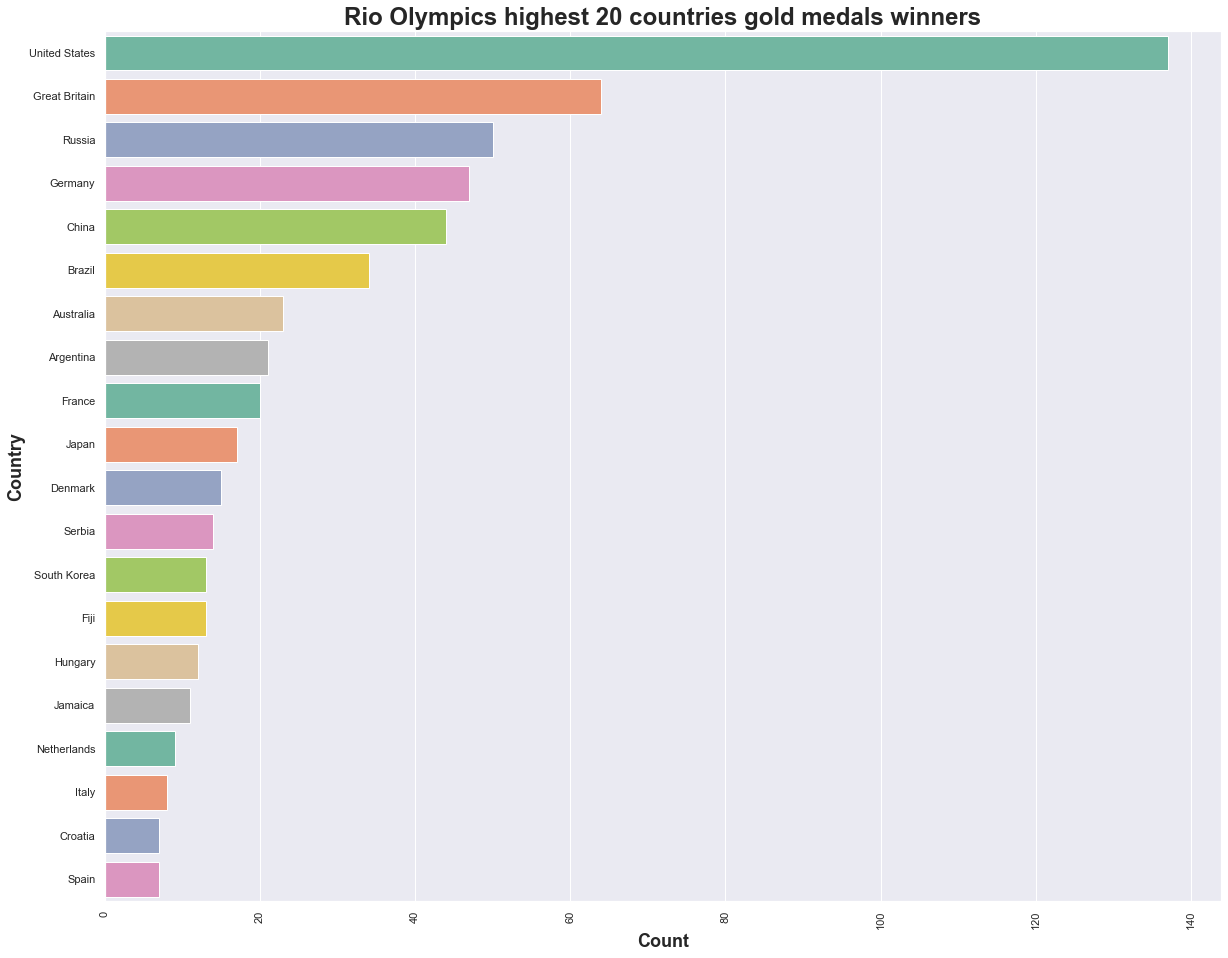

In [79]:
sns.set_style('darkgrid')
plt.figure(figsize=(20,16))
sns.barplot(x=rio_gold, y= rio_gold.index, palette='Set2')
plt.title('Rio Olympics highest 20 countries gold medals winners', fontsize = 24, weight = 'bold')
plt.xlabel('Count', fontsize = 18, weight = 'bold')
plt.ylabel('Country', fontsize = 18, weight = 'bold')
plt.xticks(rotation = 90)
plt.show();

>The United States lead with 137 gold medals followed by Great Britains 64 gold medals and Russia's 50 medals.

# Distribution of height and weight of all atheletes

In [80]:
#Creating a dataframe with no NAN values...
not_null_medals = df[(df['height'].notnull())&(df['weight'].notnull())]

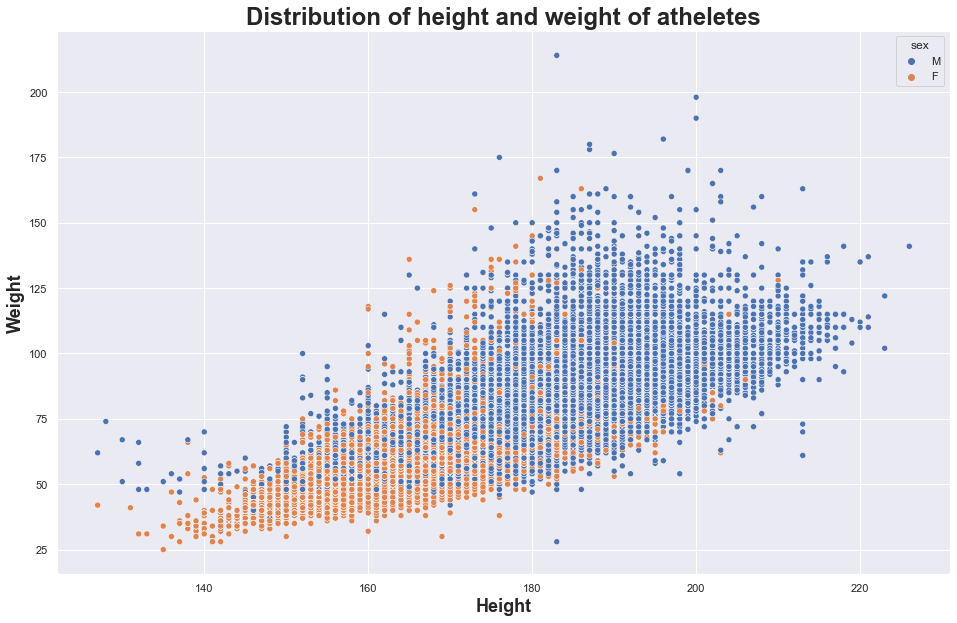

In [81]:
plt.figure(figsize=(16,10))
axis = sns.scatterplot(x = 'height', y ='weight', data = not_null_medals, hue = 'sex')
plt.title('Distribution of height and weight of atheletes', fontsize = 24, weight = 'bold')
plt.xlabel('Height', fontsize = 18, weight = 'bold')
plt.ylabel('Weight', fontsize = 18, weight = 'bold')
plt.show();

# Conclusions:

>In 1948 India won an impressive 20 gold medals and there is a decreasing trend in the last years.
 
>The number of indian women participating in the olympics has increased in the recent years, their highest participation was in 2016 with 62 participant compared to 68 indian male participant.

>In 1964 the number of Indian males participants was 111 compared to only one female.

>In 2004, Japan won 52 Bronze medals as its highest Bronze medals in one year. In 1964, they won 32 Gold medals as its highest Gold medals in one year. In 2014, they won 42 Gold medals as its highest Silver medals in one year.

>In 2008, Japanese females made their best participation with 218, while the males best participation was in 1964 with 414.

>The United States is leading the charts with 17847 participants followed by France, Great Britain and Italy.

>Ages between the 20 and 27 are the most frequent throughout all participants.

> Cross Country Skiing and Alpine Skiing are leading the sports of the winter olympics, followed by Speed Skating, Ice Hockey and Biathlon.

>Athletics, Gymnastics and Swimming are by far the most frequent sports in the summer Olympics.

>Men are obviously more represented in the olympics with 72.51%.

>The United States has won 2474 gold medals, followed by the Soviet Union with 1058 gold medals and Germany with 679 gold medals.

>The United States has won 1512 silver medals, followed by the Soviet Union with 716 silver medals and Germany with 627 silver medals.

>The United States has won 1233 bronze medals, followed by the Soviet Union with 678 bronze medals and Germany with 677 bronze medals.

>Since 1992, there is an increasing trend of the number of women participating in the summer olympics.

>Michael Fred Phelps, II has wan an impressive 23 medals, followed by Raymond Clarence "Ray" Ewry with 10 medals, and Paavo Johannes Nurmi, Larysa Semenivna Latynina (Diriy-), Mark Andrew Spitz, Frederick Carlton "Carl" Lewis all with 9 medals each.

>Oscar Gomer Swahn the swedish shooter, has won 3 gold medals after 60 years of age, Impressive!!

>In RIO Olympics, the United States lead with 137 gold medals followed by Great Britains 64 gold medals and Russia's 50 medals.